<a href="https://colab.research.google.com/github/amir-zeraati/regression_by_tensorflow/blob/main/complete_regression_project_by_FCNN(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing necessary libraries
!pip install dcor
!pip install joblib
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sn
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import dcor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, make_scorer
#if you are using google colab please import these ones otherwise comment or remove them:
from google.colab import drive
drive.mount('/content/drive/') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 1.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
#Importing the DataSet and Preprocessing
df=pd.read_excel('/content/drive/My Drive/sample.xlsx')
for i in range(df['IFT'].shape[0]): 
  x = df['I'].isnull()[i]
  if x == True: 
    print(i)
#Pearson's Correlation Matrix
corrMatrix = df.corr(method='pearson')
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()
# print(df)
#assign X and y
X= df[['T',	'P',	'mlal',	'M',	'I']]
# print(X)
Y=df['IFT']
# print(Y)
#Distance Correlation Matrix
Xd= X.to_numpy().astype(float)
Yd= Y.to_numpy().reshape(-1,1)
for i in range(0,Yd.shape[0]):
    try:
        Yd[i].astype(float)
    except:
        print ("error is on line",i)
d_corr=[]
for i in range(Yd.shape[1]):
  for j in range(Xd.shape[1]):
    temp= dcor.distance_correlation(Xd[:,j],Yd[:,i])
    d_corr.append(temp)
d_corr= np.array(d_corr)
d_corr= d_corr.reshape(Xd.shape[1],Yd.shape[1], order='F')
print(d_corr)
sn.heatmap(d_corr, annot=True)
plt.show()
#Bar chart
plt.bar(['T',	'P',	'mlal',	'M',	'I'], d_corr.reshape(-1))
plt.title('Distance Correlation Coefficients between features and output')
plt.xlabel('Features')
plt.ylabel('Distance Correlation Coefficient with output')
plt.show()
#Split 90/10 80/20 70/30 for ML and in DL it depends but around a few percent
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# print(X_test)
#Converting to arrays removing column names and indices
X_train= X_train.to_numpy()
X_test= X_test.to_numpy()
y_train= y_train.to_numpy()
y_test= y_test.to_numpy()
# print(X_test)
#We Should do Normalization
scaler_y = MinMaxScaler()
scaler_x = MinMaxScaler()
# scaler_y = StandardScaler()
scaler_x.fit(X_train)
X_train=scaler_x.transform(X_train)
scaler_y.fit(y_train.reshape(-1,1))
y_train=scaler_y.transform(y_train.reshape(-1,1))

NameError: ignored

In [ ]:
#@title
#Make a Model (Neural Network)
#Input layer: #of features
#Hidden layers: the average of output and input layers
#Output layer: the # of outputs
#Activation functions: for input and hidden layer: best option is relu or LeakyRelu: tf.keras.layers.LeakyReLU(alpha=0.3, **kwargs)
#for output it's based on the problem: Linear for Regression/ softmax and sigmoid for classification
feature_number=X_train.shape[1]
output_number=y_train.shape[1]
model = Sequential() #model is an object in Sequential class
model.add(Dense((output_number+feature_number)/2+20, input_dim=feature_number, activation= tf.keras.layers.LeakyReLU(alpha=0.3), kernel_initializer="he_normal")) 
model.add(Dense(output_number, activation='linear'))
model.summary()
#plot a 2D representation of the Model and save it 
# tf.keras.utils.plot_model(model, to_file='/content/drive/My Drive/Schematic.png', show_shapes=True)
#the address to save the model
checkpoint_filepath =r'/content/drive/My Drive/DrVN.mdl_wts.hdf5'
mcp_save = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_loss', mode='min')
#Learning rate decay 1. exponential decay: initial_learning_rate * decay_rate ^ (step / decay_steps)
# initial_learning_rate = 0.1
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True)
# optimizer1= tf.keras.optimizers.Adam()
#Compile the model: different loss for Regression problems
model.compile(loss='mse', optimizer='adam' , metrics=['mse','mae', tf.keras.metrics.RootMeanSquaredError()])
# #EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss' , patience=50)
#Make a History of the training and train the model
history= model.fit(X_train, y_train, epochs=2000, verbose=1, validation_split=0.1,callbacks=[callback, mcp_save])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 23)                138       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 24        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
33/33 [==============================] - 1s 12ms/step - loss: 0.1164 - mse: 0.1164 - mae: 0.2850 - root_mean_squared_error: 0.3641 - val_loss: 0.0816 - val_mse: 0.0816 - val_mae: 0.2409 - val_root_mean_squared_error: 0.3376
Epoch 2/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.0697 - mse: 0.0697 - mae: 0.2154 - root_mean_squared_error: 0.3181 - val_loss: 0.0490 - val_mse: 0.0490 - val_mae: 0.1832 - val_root_mean_squared_error: 0.3016
Epoch 3/2000
33/33 [========================

dict_keys(['loss', 'mse', 'mae', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_root_mean_squared_error'])


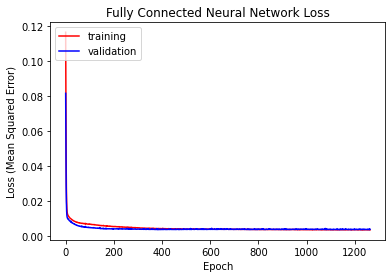

<Figure size 432x288 with 0 Axes>

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'], c='red')
plt.plot(history.history['val_loss'], c='blue')
plt.title('Fully Connected Neural Network Loss')
plt.ylabel('Loss (Mean Squared Error)')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
plt.savefig('/content/drive/My Drive/FCNN_Loss.png')

In [ ]:
import copy
X_t = copy.deepcopy(X_test)
X_t = scaler_x.transform(X_t)
PG = model.predict(X_t)
#Computing the error of the Training Set
RMSE1= tf.keras.metrics.RootMeanSquaredError()
predictions1= model.predict(X_train)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y1=copy.deepcopy(scaler_y.inverse_transform(y_train))
p1=copy.deepcopy(scaler_y.inverse_transform(predictions1))
PG1=copy.deepcopy(scaler_y.inverse_transform(PG))

# print('Weighted average of training set score and test set score:',(r2_score(y_test, pg)+4*r2_score(scaler_y.inverse_transform(y_train), predictions1))/5)
for i in range(y_train.shape[1]):
  print('training set score for parameter number {}:'.format(i+1), r2_score(y_train[:,i], predictions1[:,i]))
  print('training set MAE for parameter number {}:'.format(i+1),  mean_absolute_error(y1[:,i], p1[:,i]))
  print('training set RMSE for parameter number {}:'.format(i+1),  np.sqrt(mean_squared_error(y1[:,i], p1[:,i])))
  print('test set score for parameter number {}:'.format(i+1), r2_score(y_test.reshape(-1,1)[:,i], PG1[:,i]))
  print('test set MAE for parameter number {}:'.format(i+1), mean_absolute_error(y_test.reshape(-1,1)[:,i], PG1[:,i]))
  print('test set RMSE for parameter number {}:'.format(i+1),  np.sqrt(mean_squared_error(y_test.reshape(-1,1)[:,i], PG1[:,i])), '\n')

training set score for parameter number 1: 0.8573065436159262
training set MAE for parameter number 1: 2.401817592338382
training set RMSE for parameter number 1: 3.650174211679374
test set score for parameter number 1: 0.8261485751183726
test set MAE for parameter number 1: 2.629257379838198
test set RMSE for parameter number 1: 3.8727997851512215 



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'Predictions from the ANN')

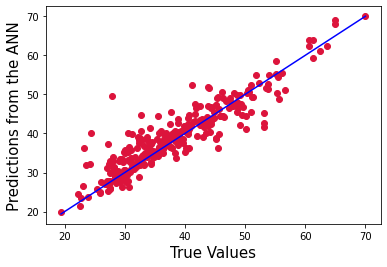

In [ ]:
plt.scatter(y_test, PG1, c='crimson')
p1 = max(max(PG1), max(y_test))
p2 = min(min(PG1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions from the ANN', fontsize=15)

In [ ]:
#Make a Model (Neural Network)
#Input layer: #of features
#Hidden layers: the average of output and input layers
#Output layer: the # of outputs
#Activation functions: for input and hidden layer: best option is relu or LeakyRelu: tf.keras.layers.LeakyReLU(alpha=0.3, **kwargs)
#for output it's based on the problem: Linear for Regression/ softmax and sigmoid for classification
#First we should define the structure of the model in a function as follows and use the hyparameters that we want to tune as inputs of function:
#(in here neurons is the only parameter that we want to tune so the input is neurons)
feature_number=Xd.shape[1]
def create_model(neurons):
  #structure of the model
  model = Sequential() #model is an object in Sequential class
  model.add(Dense(neurons, input_dim = feature_number, activation ='tanh'))  
  model.add(Dense(1, activation='linear'))
  #learning rate decay
  initial_learning_rate = 0.1
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=100, decay_rate=0.96, staircase=True)
  optimizer1= tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  #Compile the model
  model.compile(loss='mse', optimizer=optimizer1, metrics=['mse','mae', tf.keras.metrics.RootMeanSquaredError()])
  return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# this part is for add some details to the object model like number of epochs 
#and make the structure of the model readable for next parts if your problem is Classification use KerassClassifier and if it's Regression use KerasResgressor
model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=100,  verbose=1)
#make a pipeline to be sure that in cross validation after splitting normalizing happens and then training of the model starts
new_model = Pipeline([('scaler', MinMaxScaler()), ('model', model)])
#now we should make hyperparameters' grid so we make a dictionary that has the structure of model__hyperparameter: range of hayperparameter, in here we test the neurons from 3 to 11
param_grid = dict(model__neurons = np.arange(3,11))
#now we have all parameters for a hyperparameter grid search, we use them as inputs for GridSearchCV: 
grid = GridSearchCV(estimator=new_model, param_grid=param_grid, n_jobs=-1, cv=5, scoring=make_scorer(r2_score, greater_is_better=True), verbose=1)
#scaler for output normalization, in pipeline only inputs will be normalized
scal = MinMaxScaler()
#using features and outputs for fitting GridSearchCV in other words start train the model in GridSearchCV on these inputs and outputs
grid_result = grid.fit(Xd, scal.fit_transform(Yd))

In [ ]:
# print(grid_result.cv_results_)
# print(grid_result.best_estimator_)
print(grid_result.best_score_)
print(grid_result.best_params_)
print(grid_result.best_index_)